## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how='outer', on= 'Mouse ID')

# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_metadata.head()
mouse_metadata['Mouse ID'].value_counts()

k894    1
r107    1
q132    1
q633    1
j119    1
       ..
o331    1
a788    1
z234    1
u364    1
k804    1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
study_results.head()
study_results['Mouse ID'].value_counts()

g989    13
j913    10
w575    10
s508    10
y260    10
        ..
n482     1
b447     1
x226     1
x336     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Checking the number of mice.
combined['Mouse ID'].value_counts()
#mouse_count = combined['Mouse ID'].nunique()

#mouse_count

g989    13
k894    10
a251    10
z795    10
r604    10
        ..
f932     1
v199     1
l872     1
x226     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Select duplicate rows except last occurrence based on all columns
###duplicateRowsDF = combined[
duplicateRowsDF = combined[combined.duplicated(keep = 'last')]

#duplicateRowsDF
print(duplicateRowsDF['Mouse ID'])



908    g989
Name: Mouse ID, dtype: object


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicateRowsDF

#df_withduplicates = combined.groupby(by=['Mouse ID'], dropna= False).count()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


####get row index
duplicateRowsDF.index

clean_combineddf =  combined.drop(labels=None, axis=0, index=duplicateRowsDF.index, columns=None, level=None, inplace=False, errors='raise')
clean_combineddf


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.

clean_combineddf['Mouse ID'].value_counts()
cleanmouse_count = clean_combineddf['Mouse ID'].nunique()
cleanmouse_count

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


##Regimen
clean_combineddf['Drug Regimen'].value_counts()
unique_regimens = clean_combineddf['Drug Regimen'].unique().tolist()
unique_regimens = pd.DataFrame(unique_regimens,columns=['Drug Regimen'])
unique_regimens

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

##Ramicane

#ramicance_df=
 
#quartiles = clean_combineddf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#lowerq

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumorVol = clean_combineddf.groupby(['Drug Regimen'], as_index=True).mean()
mean_df=pd.DataFrame(mean_tumorVol['Tumor Volume (mm3)'])
mean_df=mean_df.rename(columns={'Tumor Volume (mm3)' : 'Tumor Volume - Mean'})


median_tumorVol = clean_combineddf.groupby(['Drug Regimen']).median()
median_df = pd.DataFrame(median_tumorVol['Tumor Volume (mm3)'])
median_df = median_df.rename(columns={'Tumor Volume (mm3)' : 'Tumor Volume - Median'})


variance_tumorVol = clean_combineddf.groupby(['Drug Regimen']).var(ddof=1)
var_df = pd.DataFrame(variance_tumorVol['Tumor Volume (mm3)'])
var_df = var_df.rename(columns = {'Tumor Volume (mm3)' : 'Tumor Volume - Variance'})

stdev_tumorVol = clean_combineddf.groupby(['Drug Regimen']).std(ddof=1)
stddev_df = pd.DataFrame(stdev_tumorVol['Tumor Volume (mm3)'])
stddev_df = stddev_df.rename(columns = {'Tumor Volume (mm3)': 'Tumor Volume - Std Dev'})

sem_tumorVol = clean_combineddf.groupby(['Drug Regimen']).sem()
sem_df = pd.DataFrame(sem_tumorVol['Tumor Volume (mm3)'])
sem_df = sem_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume - SEM'})


# Assemble the resulting series into a single summary dataframe.

###append Mean

tumorVol_summarydf = mean_df

###append Median

tumorVol_summarydf['Tumor Volume - Median'] = median_df['Tumor Volume - Median']

###append Variance

tumorVol_summarydf['Tumor Volume - Variance'] = var_df['Tumor Volume - Variance']

###append Standard Deviation

tumorVol_summarydf['Tumor Volume - Std Dev'] = stddev_df['Tumor Volume - Std Dev']

###append SEM

tumorVol_summarydf['Tumor Volume - SEM'] = sem_df['Tumor Volume - SEM']

tumorVol_summarydf



,Tumor Volume - Mean,Tumor Volume - Median,Tumor Volume - Variance,Tumor Volume - Std Dev,Tumor Volume - SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


agg_tumorVol_summarydf = clean_combineddf.groupby(['Drug Regimen']).agg(mean = pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="mean"),
    median = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "median"),
    variance = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "var"),
    stddev = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "std"),
    SEM = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "sem"))
agg_tumorVol_summarydf

,mean,median,variance,stddev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
mouse_count = clean_combineddf['Drug Regimen'].nunique()

mouse_count


unique_df = clean_combineddf.groupby(by='Drug Regimen', as_index=False).agg({'Mouse ID': pd.Series.nunique})
unique_df = unique_df.rename(columns={'Mouse ID': 'Mouse ID - Unique Count'})

unique_df

,Drug Regimen,Mouse ID - Unique Count
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,25
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


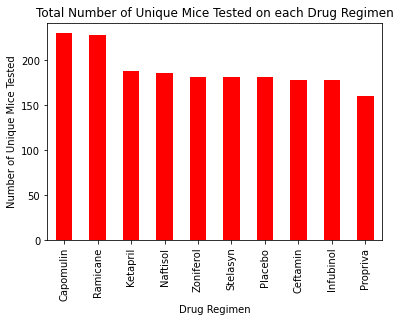

<Figure size 432x288 with 0 Axes>

In [51]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#Get mice data
mice_data=clean_combineddf['Drug Regimen'].value_counts()
#mice_data = clean_combineddf.groupby(by='Drug Regimen', as_index=True).agg({'Mouse ID': pd.value_counts()})
#mice_data = mice_data.rename(columns={'Mouse ID': 'Mouse ID - Unique Count'})
mice_data

#Configure plot and ticks
mice_data.plot(kind="bar", facecolor="red")


# Set textual properties
plt.title("Total Number of Unique Mice Tested on each Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")

# Show plot
plt.show()

# Resize plot to display labels
plt.tight_layout()



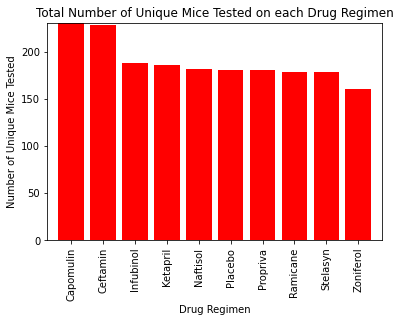

In [54]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

unique_mice_tested = mice_data#["Mouse ID - Unique Count"]

regimens = unique_df["Drug Regimen"]
regimens

x_axis = np.arange(len(unique_mice_tested ))

# Create a bar chart based upon the above data
plt.bar(x_axis, unique_mice_tested, color="r", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens, rotation = 90)

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

# Set the limits of the y axis
plt.ylim(0, max(unique_mice_tested)+0.4)

# Give the chart a title, x label, and y label
plt.title("Total Number of Unique Mice Tested on each Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")

# Show plot
plt.show()

# Resize plot to display labels
#plt.tight_layout()



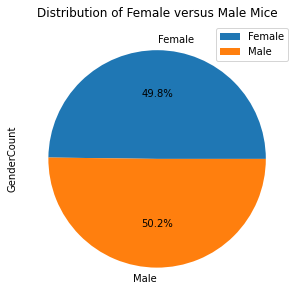

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

grpgender_df= mouse_metadata.groupby(['Sex']).agg(GenderCount = pd.NamedAgg(column="Sex", aggfunc="count"))
#grpgender_df = grpgender_df.groupby(by='Drug Regimen', as_index=False).agg({'Mouse ID': pd.Series.nunique})
grpgender_df


plot = grpgender_df.plot.pie(y='GenderCount', figsize=(5, 5), title = "Distribution of Female versus Male Mice",
        autopct="%1.1f%%")
#clean_combineddf['Drug Regimen']

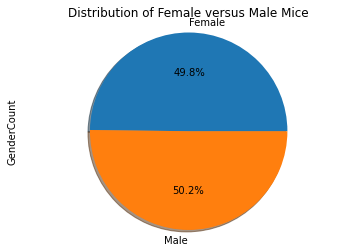

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

grpgender_df2= mouse_metadata.groupby(['Sex'], as_index=False).count()#agg(GenderCount = pd.NamedAgg(column="Sex2", aggfunc="count"))
#grpgender_df = grpgender_df.groupby(by='Drug Regimen', as_index=False).agg({'Mouse ID': pd.Series.nunique})

grpgender_df2

plt.title("Distribution of Female versus Male Mice")
plt.pie(grpgender_df2["Mouse ID"], labels=grpgender_df2["Sex"],
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.ylabel("GenderCount")
plt.show()



## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#max_tpt = clean_combineddf.groupby(by='Mouse ID', as_index=True).max()
#max_tpt

#### sort timepts in descending order
sort_timept_combineddf = clean_combineddf.sort_values('Timepoint', ascending=False)

####create the 'most_recent' dataframe to keep records for each mouse at the maximum Timepoint
most_recent = sort_timept_combineddf.drop_duplicates('Mouse ID', keep='first')

most_recent

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_cleandf = clean_combineddf.merge(most_recent, how='left', 
                                        left_on=["Mouse ID"], 
                                        right_on =["Mouse ID"],
                                         suffixes=('', '_at max Timepoint')
                                       )

merged_cleandf      

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_at max Timepoint,Sex_at max Timepoint,Age_months_at max Timepoint,Weight (g)_at max Timepoint,Timepoint_at max Timepoint,Tumor Volume (mm3)_at max Timepoint,Metastatic Sites_at max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,Ramicane,Male,21,16,45,22.050126,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,Ramicane,Male,21,16,45,22.050126,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,Ramicane,Male,21,16,45,22.050126,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,Ramicane,Male,21,16,45,22.050126,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,Ramicane,Male,21,16,45,22.050126,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2,Naftisol,Male,9,30,45,73.867845,4
1888,z969,Naftisol,Male,9,30,30,65.841013,3,Naftisol,Male,9,30,45,73.867845,4
1889,z969,Naftisol,Male,9,30,35,69.176246,4,Naftisol,Male,9,30,45,73.867845,4
1890,z969,Naftisol,Male,9,30,40,70.314904,4,Naftisol,Male,9,30,45,73.867845,4


In [32]:
#### sort timepts in descending order
sort_timept_combineddf = clean_combineddf.sort_values('Timepoint', ascending=False)

####create the 'most_recent' dataframe to keep records for each mouse at the maximum Timepoint
most_recent = sort_timept_combineddf.drop_duplicates('Mouse ID', keep='first')

most_recent

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_cleandf = clean_combineddf.merge(most_recent, how='left', 
                                        left_on=["Mouse ID"], 
                                        right_on =["Mouse ID"],
                                         suffixes=('', '_at max Timepoint')
                                       )

merged_cleandf                                    
##merged_df = left_df.merge(right_df, how='inner', left_on=["A", "B"], right_on=["A2","B2"])
##Merge based o

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_at max Timepoint,Sex_at max Timepoint,Age_months_at max Timepoint,Weight (g)_at max Timepoint,Timepoint_at max Timepoint,Tumor Volume (mm3)_at max Timepoint,Metastatic Sites_at max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,Ramicane,Male,21,16,45,22.050126,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,Ramicane,Male,21,16,45,22.050126,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,Ramicane,Male,21,16,45,22.050126,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,Ramicane,Male,21,16,45,22.050126,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,Ramicane,Male,21,16,45,22.050126,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2,Naftisol,Male,9,30,45,73.867845,4
1888,z969,Naftisol,Male,9,30,30,65.841013,3,Naftisol,Male,9,30,45,73.867845,4
1889,z969,Naftisol,Male,9,30,35,69.176246,4,Naftisol,Male,9,30,45,73.867845,4
1890,z969,Naftisol,Male,9,30,40,70.314904,4,Naftisol,Male,9,30,45,73.867845,4


In [25]:
max_tpt2 = clean_combineddf.sort_values(['Timepoint'], ascending=[False]).groupby('Mouse ID').first()
max_tpt2

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [78]:
# Put treatments into a list for for loop (and later for plot labels)

treatments_df = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments_df

# Create empty list to fill with tumor vol data (for plotting)
tumorVolume_df=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatments_df:
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #TumorVolume_Final = clean_combineddf.loc[clean_combineddf["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']
    TumorVolume_Final = merged_cleandf.loc[merged_cleandf["Drug Regimen"] == regimen, 'Tumor Volume (mm3)_at max Timepoint']
    # add subset 
    tumorVolume_df.append(TumorVolume_Final)
    
    # Determine outliers using upper and lower bounds
    quartiles = TumorVolume_Final.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of Tumor Volume for the {regimen} Drug Regimen is: {lowerq}")
    print(f"The upper quartile of Tumor Volume for the {regimen} Drug Regimen is: {upperq}")
    print(f"The interquartile range of Tumor Volume for the {regimen} Drug Regimen is: {iqr}")
    print(f"The the median of Tumor Volume for the {regimen} Drug Regimen is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {lower_bound} could be outliers for the {regimen} Drug Regimen.")
    print(f"Values above {upper_bound} could be outliers for the {regimen} Drug Regimen.")


    outlier_tumorVol = TumorVolume_Final.loc[(merged_cleandf['Tumor Volume (mm3)_at max Timepoint'] < lower_bound) | (merged_cleandf['Tumor Volume (mm3)_at max Timepoint'] > upper_bound)]
    outlier_tumorVol
    
    print(f'Outliers for the {regimen} Drug Regimen: {outlier_tumorVol}')
    print(f"--------------------")
    print(f"--------------------")
    

The lower quartile of Tumor Volume for the Capomulin Drug Regimen is: 32.37735684
The upper quartile of Tumor Volume for the Capomulin Drug Regimen is: 40.1592203
The interquartile range of Tumor Volume for the Capomulin Drug Regimen is: 7.781863460000004
The the median of Tumor Volume for the Capomulin Drug Regimen is: 37.718505085 
Values below 20.70456164999999 could be outliers for the Capomulin Drug Regimen.
Values above 51.83201549 could be outliers for the Capomulin Drug Regimen.
Outliers for the Capomulin Drug Regimen: Series([], Name: Tumor Volume (mm3)_at max Timepoint, dtype: float64)
--------------------
--------------------
The lower quartile of Tumor Volume for the Ramicane Drug Regimen is: 31.09533505
The upper quartile of Tumor Volume for the Ramicane Drug Regimen is: 38.81036633
The interquartile range of Tumor Volume for the Ramicane Drug Regimen is: 7.715031280000002
The the median of Tumor Volume for the Ramicane Drug Regimen is: 36.37451039 
Values below 19.5227881

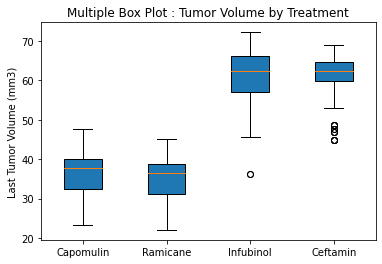

In [75]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

labels = treatments_df

#MultipleBoxplot
plt.boxplot(tumorVolume_df, vert=True, patch_artist=True, labels=labels) 
plt.ylabel('Last Tumor Volume (mm3)')
plt.title('Multiple Box Plot : Tumor Volume by Treatment')
plt.show()

## Line and Scatter Plots

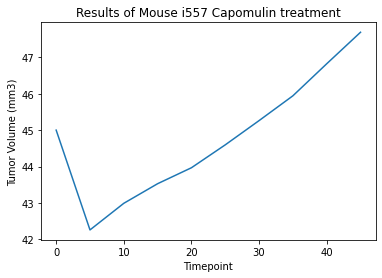

In [72]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_combineddf.loc[clean_combineddf["Drug Regimen"] == 'Capomulin']
capomulin_data

#### mouse selected has 'Mouse ID' == i557

selectedmouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == 'i557']
selectedmouse_data


####  Line Plot
plt.plot(selectedmouse_data['Timepoint'],selectedmouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Results of Mouse i557 Capomulin treatment')
plt.show()

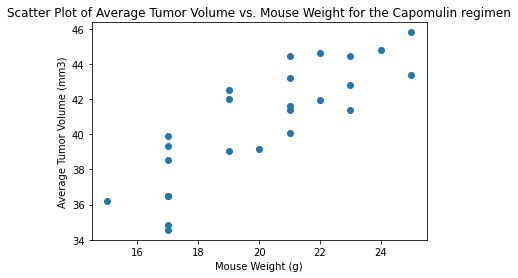

In [82]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_combineddf.loc[clean_combineddf["Drug Regimen"] == 'Capomulin']
capomulin_data

capomulin_avgTumorvol = capomulin_data.groupby(['Mouse ID']).mean()
capomulin_avgTumorvol

####create scatter plot

plt.scatter(capomulin_avgTumorvol['Weight (g)'],capomulin_avgTumorvol['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Scatter Plot of Average Tumor Volume vs. Mouse Weight for the Capomulin regimen')

plt.show()


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
